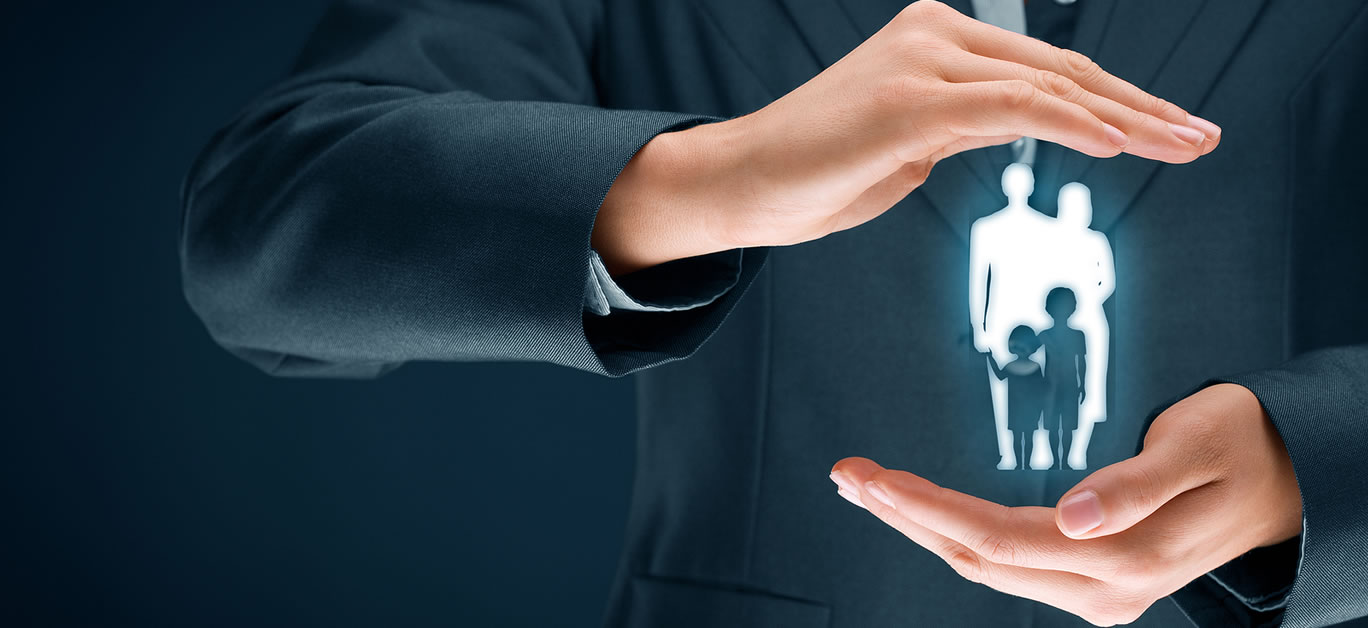

### Table of Contents

1. Business Problem
2. Import necessary library and dataset
3. Merge the datasets
4. Choosing the features
5. Train - Test Split
6. Data cleaning
7. Data types
8. Data description and Visualization
9. Relationship between predictors and target variable
10. Create dummy variables
11. Standardize features
12. Exporting the trainset and testset
13. Conclusion
 




# 1. Business Problem

A life insurance company named "LIFE UK" wants to predict the average age of a casualty in road accidents in the UK.  With the use of this prediction, the company hopes to determine the level of risk associated with insuring drivers of different age groups and adjust their premiums accordingly.
The company has access to a large quantity of data about accidents in the UK, such as the date, time, location, number and type of vehicles involved, weather conditions,the age of the drivers and passengers, among many other variables.
On this paper, we will provide descriptive and exploratory data analysis on the chosen dataset and prepare the data to be possible to build models that predict the age of the casualty accurately.

# 2. Import necessary library and dataset

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import io

import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler






In [2]:
Start_time = time.time()

def notebook_timer(xl):
    
    def wrapper (*args, **kwargs):
        
        start_time = time.time()
        
        result = fn(*args,**kwargs)
        
        end_time = time.time()
        
        time_taken = round(end_time - start_time, 4)
        
        if time_taken < 60:
            
            print(f'{fn.__name__} took {time_taken} seconds to run')

        else :

            print(f'{fn.__name__} took {time_taken/60} minutes to run')

        return result

    return wrapper


In [3]:
#Loading the datasets
accident_df = pd.read_csv('Accident.csv')
casualty_df = pd.read_csv('Casualty.csv')

In [4]:
#Testing if the object has the right type of data in it
accident_df.head(5)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010287151,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010287155,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010287157,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608


In [5]:
#Printing a concise summary of the accident_df
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101087 entries, 0 to 101086
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               101087 non-null  object 
 1   accident_year                                101087 non-null  int64  
 2   accident_reference                           101087 non-null  object 
 3   location_easting_osgr                        101070 non-null  float64
 4   location_northing_osgr                       101070 non-null  float64
 5   longitude                                    101070 non-null  float64
 6   latitude                                     101070 non-null  float64
 7   police_force                                 101087 non-null  int64  
 8   accident_severity                            101087 non-null  int64  
 9   number_of_vehicles                           101087 non-nul

In [6]:
#Testing if the object has the right type of data in it
casualty_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010287148,2021.0,10287148.0,1.0,1.0,1.0,1.0,19.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0,E01023551
1,2021010287149,2021.0,10287149.0,1.0,1.0,2.0,1.0,25.0,5.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,5.0,E01003955
2,2021010287149,2021.0,10287149.0,2.0,2.0,1.0,1.0,21.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,E01004202
3,2021010287149,2021.0,10287149.0,2.0,3.0,2.0,1.0,17.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,2.0,E01004295
4,2021010287151,2021.0,10287151.0,1.0,1.0,1.0,1.0,27.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0,E01002056


In [7]:
#Printing a concise summary of the casualty_df
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128209 entries, 0 to 128208
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   accident_index                      128209 non-null  object 
 1   accident_year                       128209 non-null  float64
 2   accident_reference                  128209 non-null  object 
 3   vehicle_reference                   128209 non-null  float64
 4   casualty_reference                  128209 non-null  float64
 5   casualty_class                      128209 non-null  float64
 6   sex_of_casualty                     128209 non-null  float64
 7   age_of_casualty                     128209 non-null  float64
 8   age_band_of_casualty                128209 non-null  float64
 9   casualty_severity                   128209 non-null  float64
 10  pedestrian_location                 128209 non-null  float64
 11  pedestrian_movement       

# 3. Merge the datasets

In [8]:
#Merging two dataframes using the common column 'accident_index'
all_df = pd.merge(accident_df,casualty_df, on = 'accident_index')

In [9]:
#Testing if the object has the right type of data in it
all_df.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0,E01023551
1,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,5.0,E01003955
2,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,E01004202
3,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,2.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,2.0,E01004295
4,2021010287151,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0,E01002056


# 4. Choosing the features

In [10]:
#Creating the dataframe with the chosen variables
df = all_df.loc[:,['number_of_vehicles','number_of_casualties','speed_limit'
                   ,'did_police_officer_attend_scene_of_accident'
                   ,'pedestrian_location','weather_conditions','carriageway_hazards'
                   ,'accident_severity','age_of_casualty','sex_of_casualty','casualty_class','casualty_severity'
                   ,'location_easting_osgr','location_northing_osgr','casualty_home_area_type'
]]

Out of the 54 variables available in the merged dataframa, we chose 14 features as predictors and our target variable 'age_of_casualty' to incude in our df

In [11]:
#Testing if the object has the right type of data in it
df.head()

,number_of_vehicles,number_of_casualties,speed_limit,did_police_officer_attend_scene_of_accident,pedestrian_location,weather_conditions,carriageway_hazards,accident_severity,age_of_casualty,sex_of_casualty,casualty_class,casualty_severity,location_easting_osgr,location_northing_osgr,casualty_home_area_type
0,3,1,30,1,0.0,7,0,3,19.0,1.0,1.0,3.0,521508.0,193079.0,1.0
1,2,3,30,1,0.0,1,0,2,25.0,1.0,2.0,3.0,535379.0,180783.0,1.0
2,2,3,30,1,0.0,1,0,2,21.0,1.0,1.0,3.0,535379.0,180783.0,1.0
3,2,3,30,1,0.0,1,0,2,17.0,1.0,2.0,2.0,535379.0,180783.0,1.0
4,2,4,30,1,0.0,1,0,2,27.0,1.0,1.0,3.0,529701.0,170398.0,1.0


In [12]:
#Checking the number of rows of df
df.shape

(89721, 15)

In [13]:
#Taking the first 12000 records 
df=df.iloc[:12000,:]

We selected the first 12000 rows to conduct our analysis

# 5. Train - Test Split

The fundamental concept of train-test split is to divide the available data into two distinct datasets, one of which is used to train the model and the other to test it. The train-test split also helps in avoiding overfitting, which happens when a model is overly complicated and matches the training data too closely, leading to weak performance on new data. We can identify overfitting and correct the model by testing it against a different test set.

In [14]:
#Splitting the datasetinto a training set and a test set
trainset,testset = train_test_split(df, test_size=0.3, random_state=7)
print(trainset.shape)
print(testset.shape)

(8400, 15)
(3600, 15)


# 6. Data cleaning

Ensuring that the data is complete by identifying and addressing missing data in the training set and in the test set

In [15]:
#Number of rows and columns of the DataFrame 
print(trainset.shape)
print(testset.shape)

(8400, 15)
(3600, 15)


The training set has 8400 rows and the test set has 3600 rows and each dataset has the 15 variables we chose

In [16]:
#Calculating the sum of missing values in each column
print(trainset.isnull().sum())
print(testset.isnull().sum())

number_of_vehicles                             0
number_of_casualties                           0
speed_limit                                    0
did_police_officer_attend_scene_of_accident    0
pedestrian_location                            0
weather_conditions                             0
carriageway_hazards                            0
accident_severity                              0
age_of_casualty                                0
sex_of_casualty                                0
casualty_class                                 0
casualty_severity                              0
location_easting_osgr                          0
location_northing_osgr                         0
casualty_home_area_type                        0
dtype: int64
number_of_vehicles                             0
number_of_casualties                           0
speed_limit                                    0
did_police_officer_attend_scene_of_accident    0
pedestrian_location                            0
weather

Neither the training set or the test set possesses missing values. However, as we know from the 'DataGuide', the '-1' value corresponds to data missing or out of range

In [17]:
#Unique values in the variable 'sex_of_casualty'
trainset['sex_of_casualty'].unique()

array([ 1.,  2., -1.])

As you can see from the code above, there are '-1' values in the dataset

In [18]:
#Checking the percentage of '-1' values in each column (normalizing the number of missing values)
percent = {}
for col in trainset.columns:
    percent[col] = (trainset[col] == -1).sum()/trainset.shape[0]
print(percent)

{'number_of_vehicles': 0.0, 'number_of_casualties': 0.0, 'speed_limit': 0.0, 'did_police_officer_attend_scene_of_accident': 0.0, 'pedestrian_location': 0.0, 'weather_conditions': 0.0, 'carriageway_hazards': 0.0, 'accident_severity': 0.0, 'age_of_casualty': 0.04523809523809524, 'sex_of_casualty': 0.026071428571428572, 'casualty_class': 0.0, 'casualty_severity': 0.0, 'location_easting_osgr': 0.0, 'location_northing_osgr': 0.0, 'casualty_home_area_type': 0.060476190476190475}


In [19]:
#Replacing '-1' with np.nan and replacing with the mode for the variable 'casualty_home_area_type'
mode_fill = trainset['casualty_home_area_type'].mode()[0]
trainset['casualty_home_area_type'] = trainset['casualty_home_area_type'].replace(-1, np.nan)
trainset['casualty_home_area_type'] = trainset['casualty_home_area_type'].fillna(mode_fill)

The variable 'casualty_home_area_type' has over 10% of missing values so we replaced them with the mode 

In [20]:
#Droping the remaining missing values in the training set
trainset = trainset.replace(-1, np.nan)
trainset= trainset.dropna()
trainset.isnull().values.any()

False

In [21]:
#Droping the remaining missing values in the test set
testset = testset.replace(-1, np.nan)
testset= testset.dropna()
testset.isnull().values.any()

False

The two last comands confirm that all the missing values were removed/replaced

# 7. Data types

In [22]:
#Printing a concise summary of the df
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 5471 to 9412
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   number_of_vehicles                           7956 non-null   int64  
 1   number_of_casualties                         7956 non-null   int64  
 2   speed_limit                                  7956 non-null   int64  
 3   did_police_officer_attend_scene_of_accident  7956 non-null   int64  
 4   pedestrian_location                          7956 non-null   float64
 5   weather_conditions                           7956 non-null   int64  
 6   carriageway_hazards                          7956 non-null   int64  
 7   accident_severity                            7956 non-null   int64  
 8   age_of_casualty                              7956 non-null   float64
 9   sex_of_casualty                              7956 non-null   float64
 1

In [23]:
#Changing the data types of the train set
for col_name in ['casualty_severity', 'did_police_officer_attend_scene_of_accident', 'pedestrian_location', 
                 'weather_conditions','carriageway_hazards','casualty_class','casualty_home_area_type',
                 'accident_severity','sex_of_casualty']:
    trainset[col_name] = trainset[col_name].astype(object)
    testset[col_name] = testset[col_name].astype(object)


Some of the columns had its data misslabeled so we changed it to the correct data type

In [24]:
#Decode the data
guide_df = pd.read_excel('Road-Safety-Open-Dataset-Data-Guide.xlsx')
guide_df
def changecolname(df, colname, guide_df):
    map = guide_df.loc[guide_df['field name'] == colname,:]
    col_decode = map.loc[:,['code/format','label']]
    col_decode = col_decode.rename(columns={'code/format': colname})
    df = pd.merge(df,col_decode, on = colname)
    return df

def renamecol(df, colname, guide_df):
    df = changecolname(df, colname, guide_df)
    df = df.drop(colname, axis = 1)
    df = df.rename(columns={'label': colname})
    return df
for col_name in ['casualty_severity', 'did_police_officer_attend_scene_of_accident', 'pedestrian_location', 
                 'weather_conditions','carriageway_hazards','casualty_class','casualty_home_area_type',
                 'accident_severity','sex_of_casualty']:
    trainset = renamecol(trainset,col_name,guide_df)
    testset = renamecol(testset,col_name,guide_df)

Replacing the 'numbers' in the categorical variables to their meaning

# 8. Data description and Visualization

In [25]:
#Descriptive analytics on numerical variables of trainset
trainset.describe()

,number_of_vehicles,number_of_casualties,speed_limit,age_of_casualty,location_easting_osgr,location_northing_osgr
count,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000,7956.000000
mean,1.906109,1.318502,27.281297,35.254274,530908.450855,180662.357466
std,0.655381,0.777667,8.238238,15.094767,9885.740990,7710.917398
min,1.000000,1.000000,20.000000,0.000000,503693.000000,156984.000000
25%,2.000000,1.000000,20.000000,25.000000,525026.750000,175602.250000
50%,2.000000,1.000000,30.000000,33.000000,531174.000000,181178.000000
75%,2.000000,1.000000,30.000000,44.000000,536673.000000,185997.000000
max,11.000000,10.000000,70.000000,98.000000,559372.000000,200725.000000


The table above provides descriptive analysis on the numerical variables of the training set such as mean, minimum and maximum value

## 8.1. Depedent Variable 

In [26]:
#Descriptive statistics for 'age of casualty'
trainset.loc[:,'age_of_casualty'].describe()

count    7956.000000
mean       35.254274
std        15.094767
min         0.000000
25%        25.000000
50%        33.000000
75%        44.000000
max        98.000000
Name: age_of_casualty, dtype: float64

The average age of casualties is 35.25, the minimum age of a casualty is 0 and the maximum is 98

[Text(0.5, 0, 'Rating'), Text(0, 0.5, 'Frequency')]

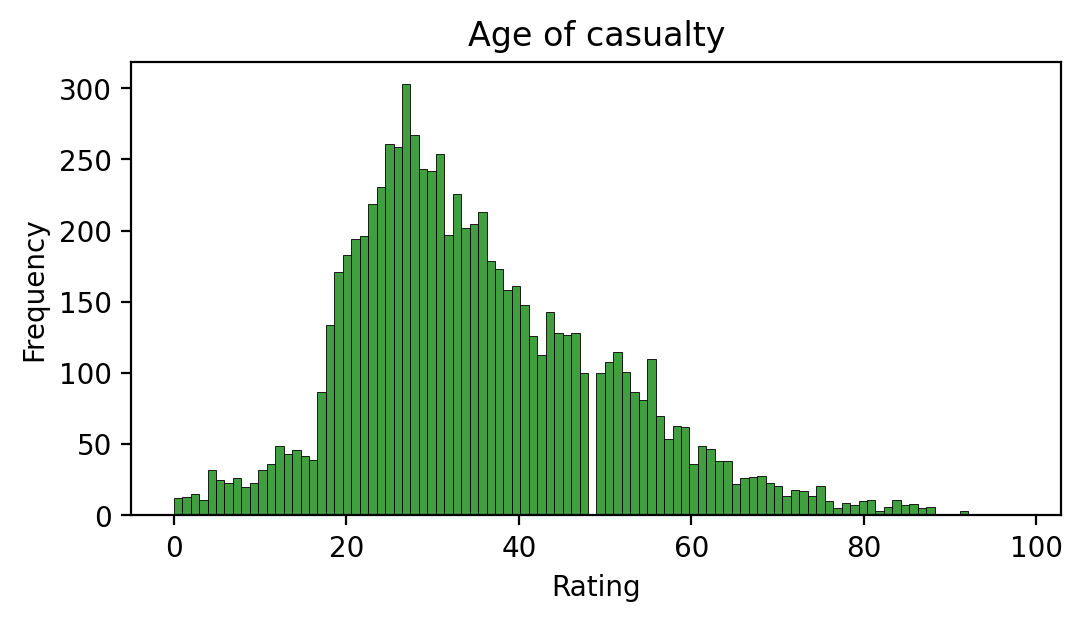

In [27]:
#Checking the distribution of the 'age of casualty'
#Histogram
plot = trainset.loc[:,'age_of_casualty']
plt.figure(figsize=(6,3), dpi=200)
hist = sns.histplot(plot, bins = 100, color="green")
hist.set_title('Age of casualty')
hist.set(xlabel = 'Rating', ylabel = 'Frequency')

<AxesSubplot:title={'center':'Age of casualty'}, xlabel='age_of_casualty'>

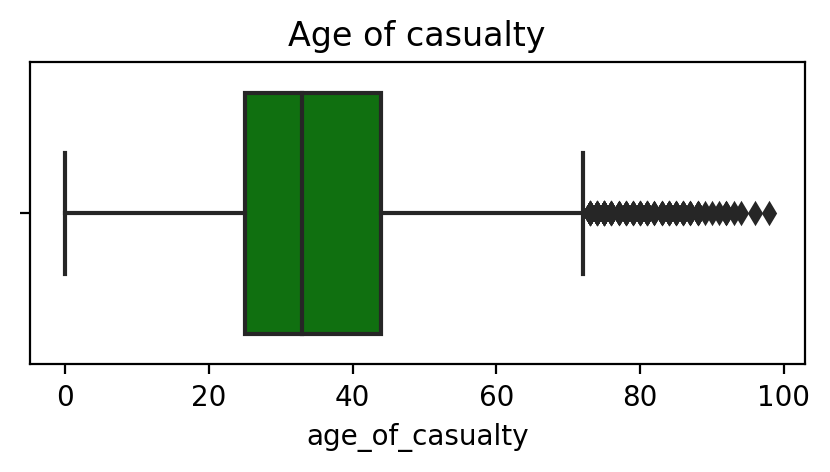

In [28]:
#Boxplot with outliers
plt.figure(figsize=(5,2), dpi=200)
plt.title('Age of casualty')
sns.boxplot(data=trainset, x="age_of_casualty", color="green")

By looking at the boxplot, we can see that there is a large number of outliers

In [29]:
#Removing outliers 
trainset= trainset[(trainset['age_of_casualty']<90)]

We decided to remove ages of casualty above 90 years old 

<AxesSubplot:title={'center':'Age of casualty'}, xlabel='age_of_casualty'>

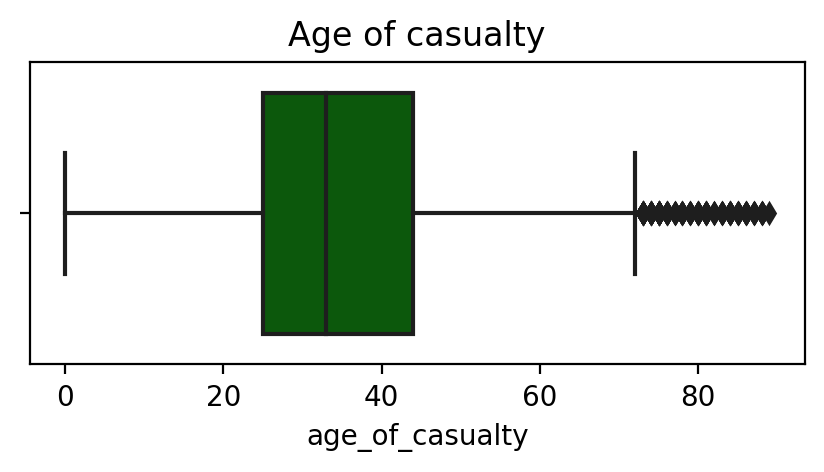

In [30]:
#Boxplot after outlier removal
plt.figure(figsize=(5,2), dpi=200)
plt.title('Age of casualty')
sns.boxplot(data=trainset, x="age_of_casualty", color="darkgreen")

## 8.2. Independent Variables

### 8.2.1 Number of vehicles                       

In [31]:
#Descriptive statistics for number of vehicles
trainset.loc[:,'number_of_vehicles'].describe()

count    7947.000000
mean        1.906883
std         0.655198
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        11.000000
Name: number_of_vehicles, dtype: float64

Out of the 8015 observations, the minimum value of vehicles per accident is 1, the maximum is 11 and the mean is 1.91

[Text(0.5, 0, 'number_of_vehicles'), Text(0, 0.5, 'Frequency')]

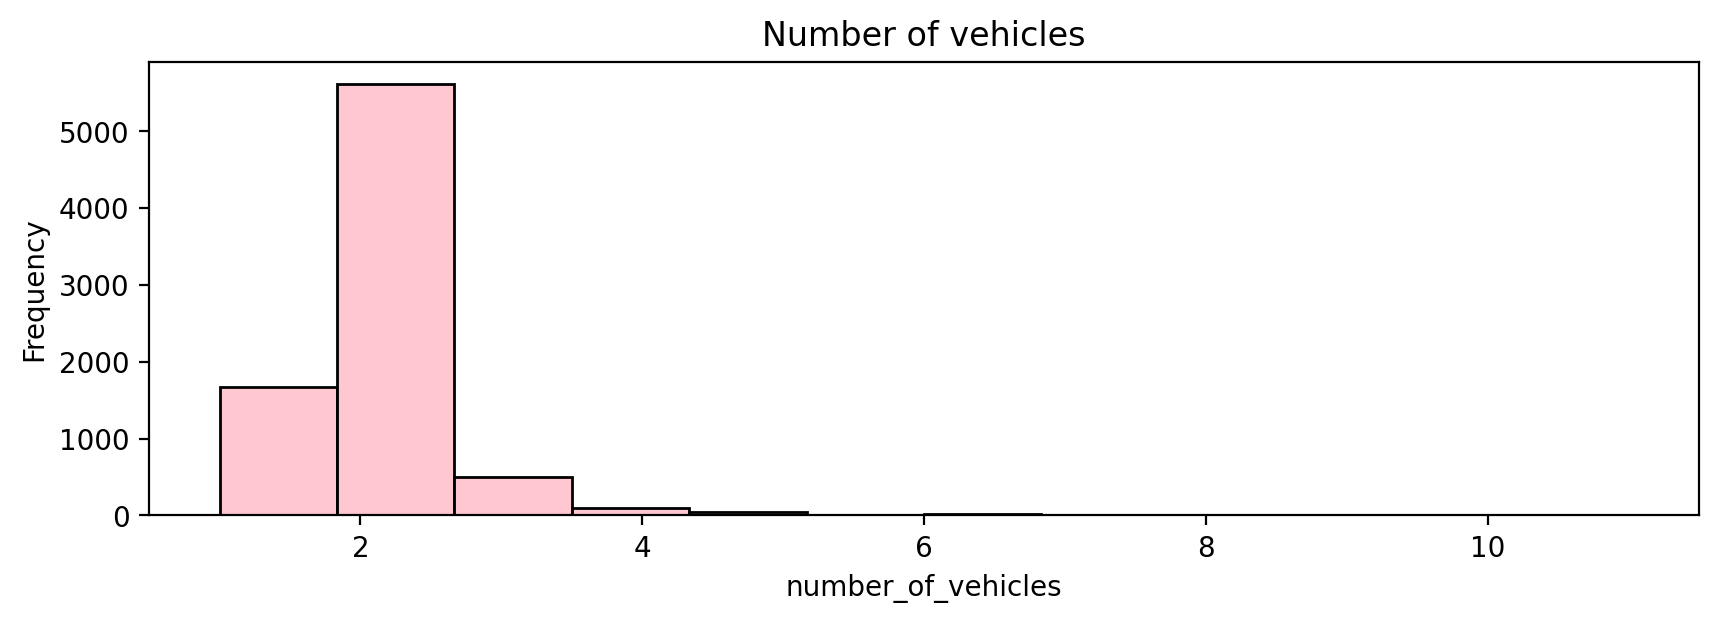

In [32]:
#Checking the distribution 
plt.figure(figsize=(10,3), dpi=200)
hist = sns.histplot(trainset.loc[:,'number_of_vehicles'].astype(float), bins = 12, color="lightpink")
hist.set_title( 'Number of vehicles')
hist.set(xlabel = 'number_of_vehicles', ylabel = 'Frequency')

The majority of the accidents involve less than 4 vehicles. Accidents involving 2 cars are the most common

### 8.2.2 Number of casualties             

In [33]:
#Descriptive statistics
trainset.loc[:,'number_of_casualties'].describe()

count    7947.000000
mean        1.318862
std         0.778034
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
Name: number_of_casualties, dtype: float64

Out of the 8015 observations, the minimum value of casualties is 1, the maximum is 10 and the mean is 1.33

[Text(0.5, 0, 'number_of_casualties'), Text(0, 0.5, 'Frequency')]

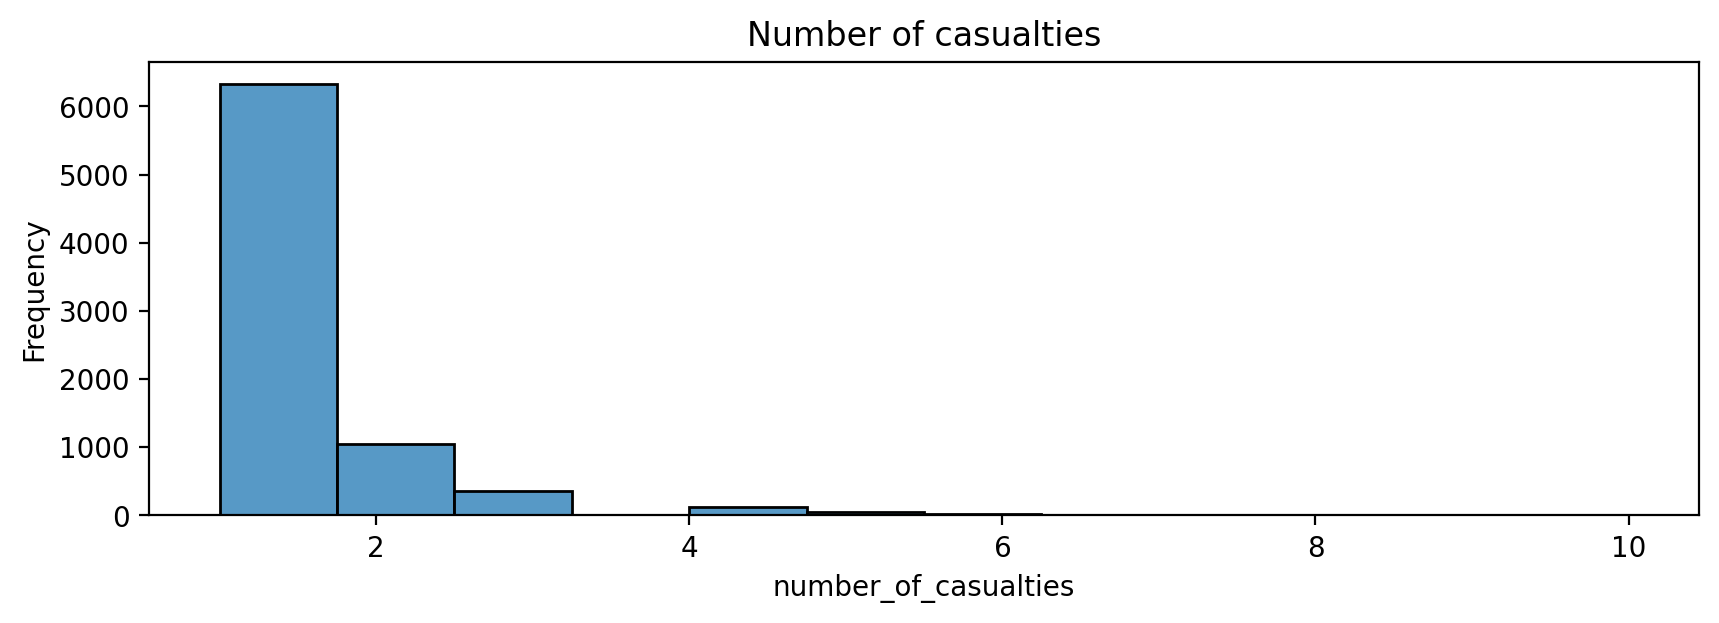

In [34]:
#Checking the distribution 
plt.figure(figsize=(10,3), dpi=200)
hist = sns.histplot(trainset.loc[:,'number_of_casualties'].astype(float), bins = 12)
hist.set_title( 'Number of casualties')
hist.set(xlabel = 'number_of_casualties', ylabel = 'Frequency')

Most of the accidents in the dataset lead to 1 casualty

### 8.2.3 Speed limit                            

In [35]:
#Descriptive statistics
trainset.loc[:,'speed_limit'].describe()

count    7947.000000
mean       27.281993
std         8.241349
min        20.000000
25%        20.000000
50%        30.000000
75%        30.000000
max        70.000000
Name: speed_limit, dtype: float64

Out of the 8015 observations, the minimum speed limit in an accident is 20 m/h, the maximum is 70m/h and the mean is 27.33 m/h

<AxesSubplot:title={'center':'Speed limit'}>

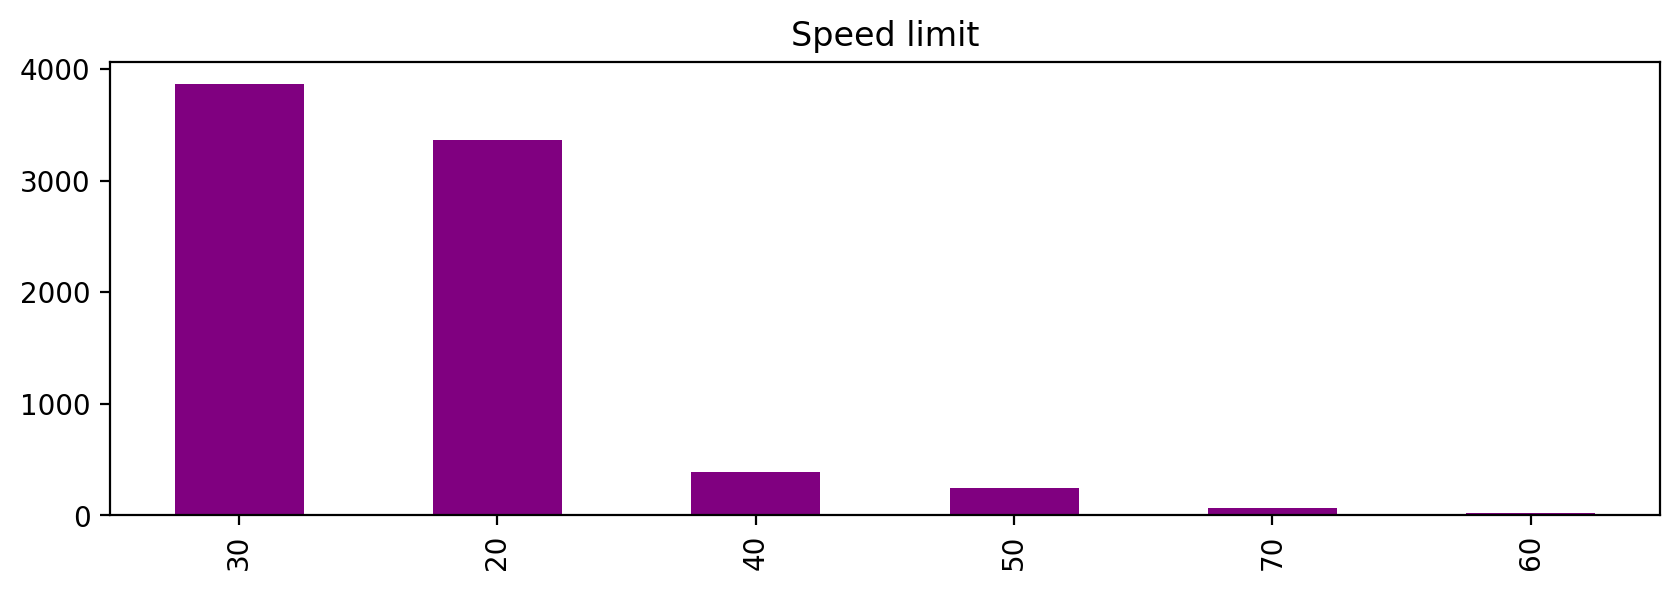

In [36]:
#Checking the distribution
plt.figure(figsize=(10,3), dpi=200)
plt.title('Speed limit')
trainset.loc[:,'speed_limit'].value_counts()[0:10].plot(kind='bar', color="purple")

### 8.2.4 Location east

[Text(0.5, 0, 'location_easting_osgr'), Text(0, 0.5, 'Frequency')]

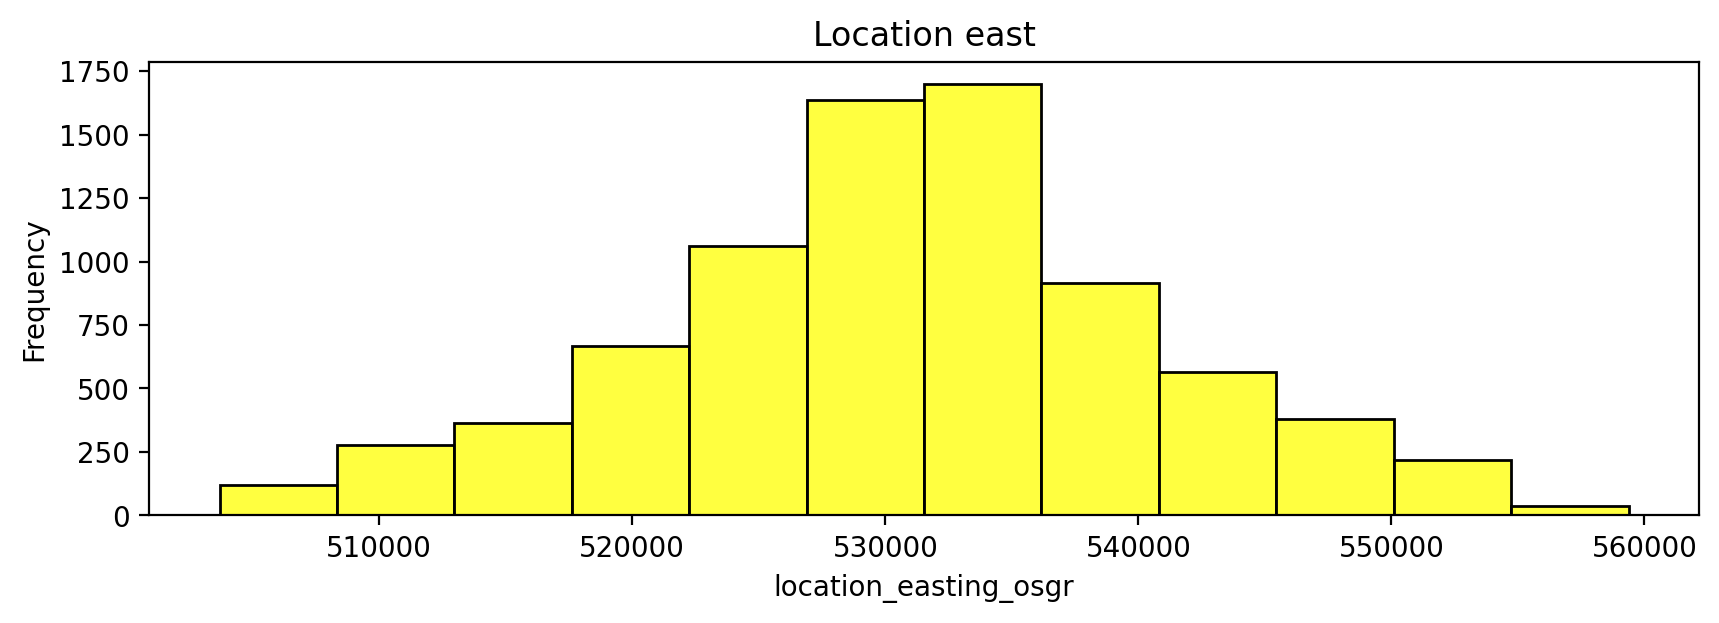

In [37]:
#Checking the distribution
plt.figure(figsize=(10,3), dpi=200)
hist = sns.histplot(trainset.loc[:,'location_easting_osgr'].astype(float), bins = 12, color="yellow")
hist.set_title( 'Location east')
hist.set(xlabel = 'location_easting_osgr', ylabel = 'Frequency')

### 8.2.5 Location north                    

[Text(0.5, 0, 'location_northing_osgr'), Text(0, 0.5, 'Frequency')]

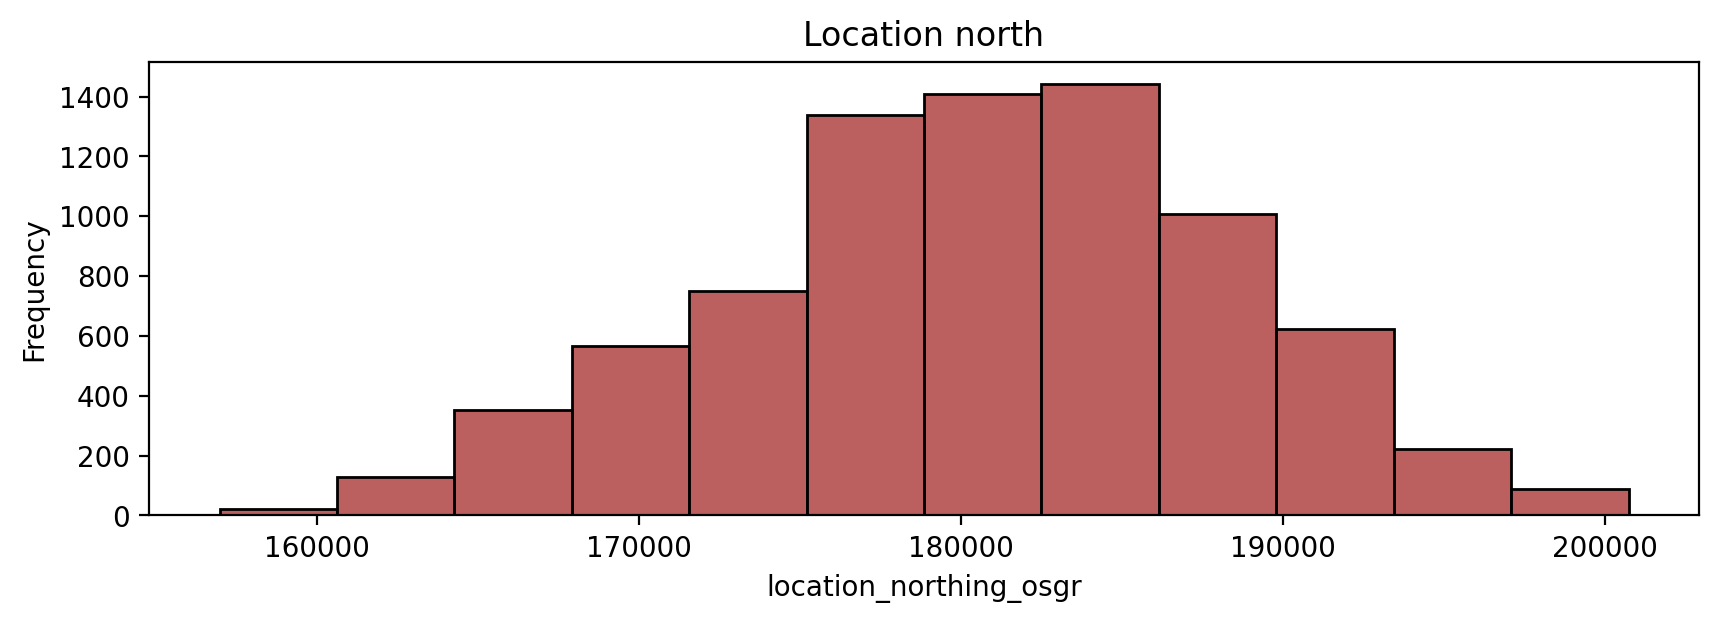

In [38]:
#Checking the distribution
plt.figure(figsize=(10,3), dpi=200)
hist = sns.histplot(trainset.loc[:,'location_northing_osgr'].astype(float), bins = 12, color="brown")
hist.set_title( 'Location north')
hist.set(xlabel = 'location_northing_osgr', ylabel = 'Frequency')

### 8.2.6 Categorical Variables

The table below describes what each category in the categorical variables means, with the exception of the variable 'sex_of_casualty'

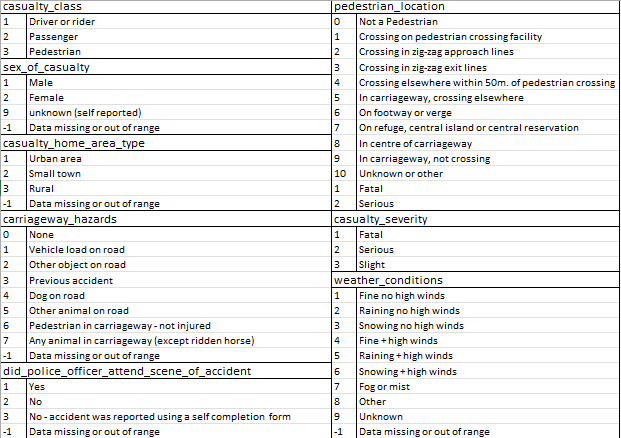

In [39]:
#Changing the 'sex of casualty' variable
#def cas_sex(sex_of_casualty):
   # if sex_of_casualty == 1:
    #    return 'Male'
   # else:
    #    return 'Female'
    
#trainset['sex'] = trainset['sex_of_casualty'].apply(cas_sex)
#testset['sex'] = testset['sex_of_casualty'].apply(cas_sex)
#trainset.head()[['sex_of_casualty','sex']]
#trainset.drop("sex_of_casualty",axis=1)

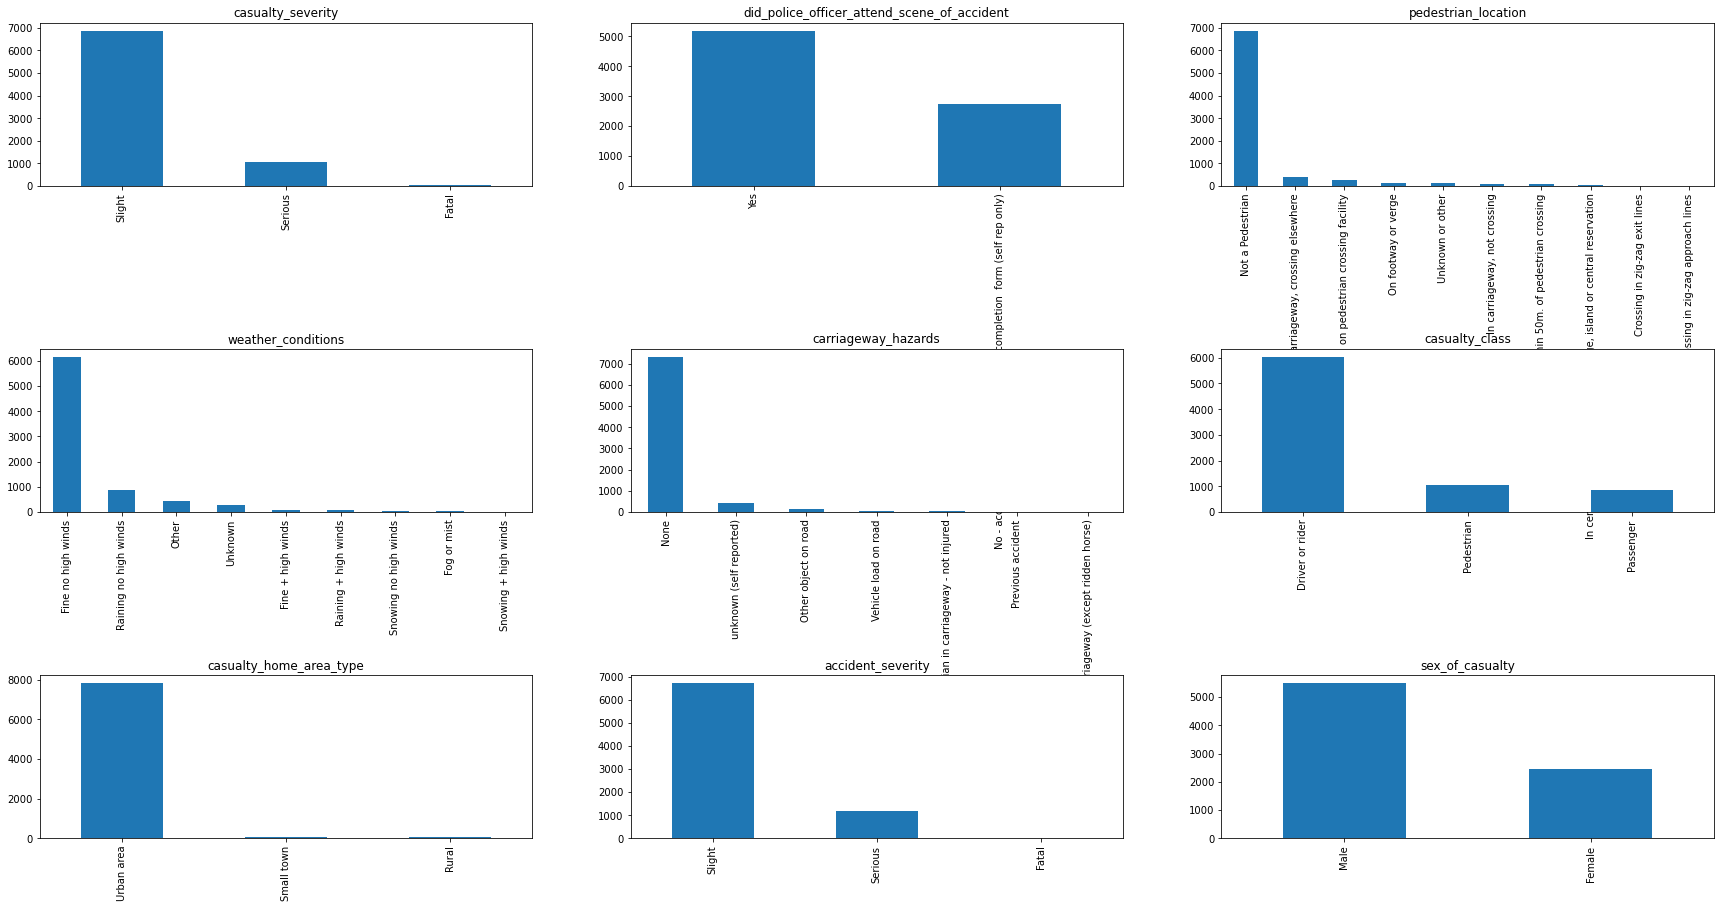

In [40]:
#Visualizing all the categorical variables
categorical_variables = trainset.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(nrows=3, ncols=math.ceil(len(categorical_variables)/3), figsize=(30, 15))

for i, categorical_variable in enumerate(categorical_variables):
    row = i // math.ceil(len(categorical_variables)/3)
    col = i % math.ceil(len(categorical_variables)/3)
    trainset[categorical_variable].value_counts().plot(kind="bar", ax=ax[row][col]).set_title(categorical_variable)

plt.subplots_adjust(hspace=1)


# 9. Relationship between predictors and target variable

## 9.1. Sex of casualty and Age of casualty

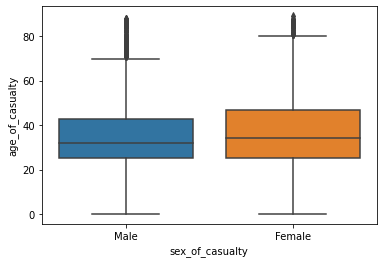

In [41]:
#Boxplots for the age of casualty by sex of the casualty
sns.boxplot(data=trainset, x='sex_of_casualty', y= 'age_of_casualty')
plt.show()

The distribution of age of casualty is very similar in both boxplots 

## 9.2 Casualty Class and Age of casualty

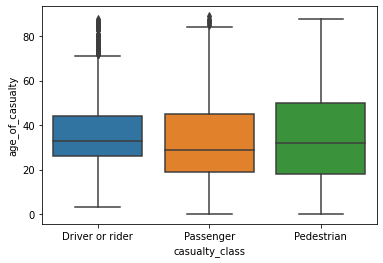

In [42]:
#Boxplots for the age of casualty by casualty class
sns.boxplot(data=trainset, x="casualty_class", y= "age_of_casualty")
plt.show()

We can observe that, on average, the age of the casualty is higher when its class is 1 which means 'Driver or rider'

## 9.3. Number of vehicle and Age of casualty

<AxesSubplot:xlabel='number_of_vehicles', ylabel='age_of_casualty'>

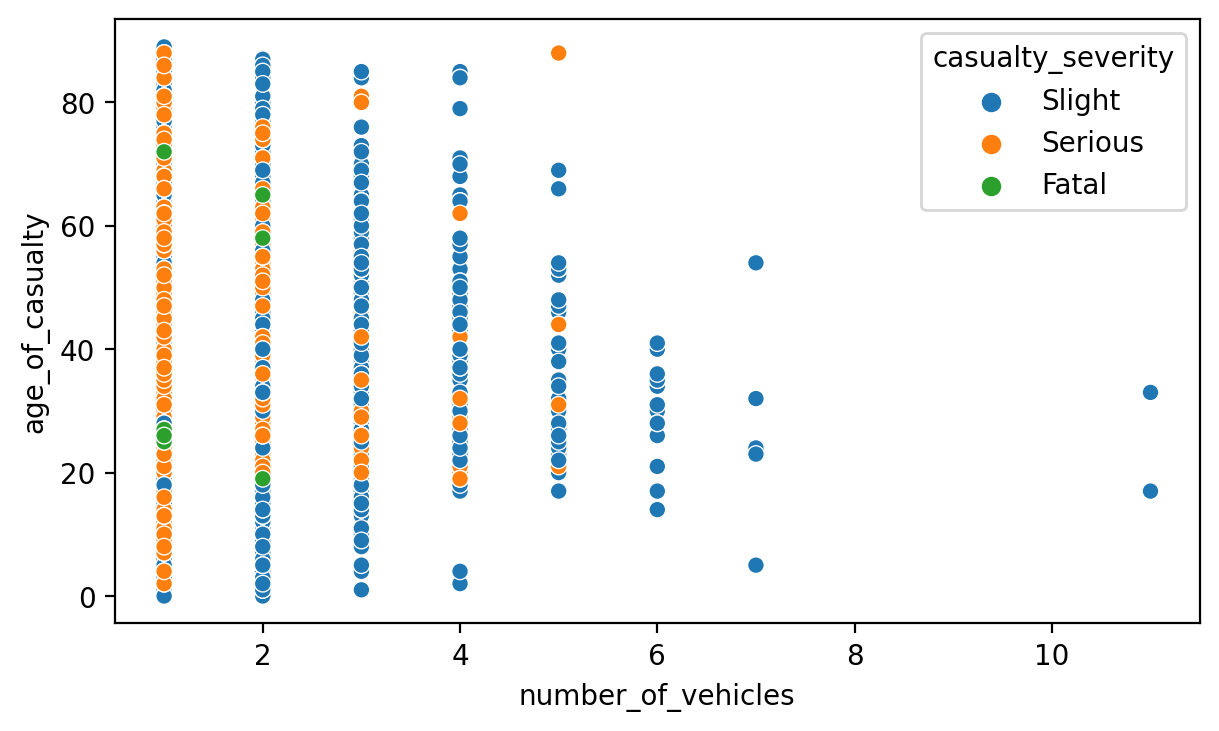

In [43]:
#Scatter plot of the variables age of casualty and number of vehicles
plt.figure(figsize=(7,4), dpi=200)
sns.scatterplot(data=trainset, x="number_of_vehicles",y="age_of_casualty", hue="casualty_severity")

# 10. Create dummy variables

In [44]:
#Creating dummy variables in the training set
trainset = pd.get_dummies(trainset, drop_first=True);

In [45]:
#Creating dummy variables in the test set
testset = pd.get_dummies(testset, drop_first=True);

In [46]:
#Testing the results for training set
trainset.head()

,number_of_vehicles,number_of_casualties,speed_limit,age_of_casualty,location_easting_osgr,location_northing_osgr,casualty_severity_Serious,casualty_severity_Slight,did_police_officer_attend_scene_of_accident_Yes,pedestrian_location_Crossing in zig-zag approach lines,...,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,carriageway_hazards_unknown (self reported),casualty_class_Passenger,casualty_class_Pedestrian,casualty_home_area_type_Small town,casualty_home_area_type_Urban area,accident_severity_Serious,accident_severity_Slight,sex_of_casualty_Male
0,2,1,30,21.0,535227.0,181264.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
1,2,1,30,35.0,540869.0,178734.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
2,2,1,20,19.0,530816.0,176977.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
3,2,1,30,26.0,540318.0,182248.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
4,2,1,30,47.0,535232.0,192318.0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1


In [47]:
#Testing the results for test set
testset.head()

,number_of_vehicles,number_of_casualties,speed_limit,age_of_casualty,location_easting_osgr,location_northing_osgr,casualty_severity_Serious,casualty_severity_Slight,did_police_officer_attend_scene_of_accident_Yes,pedestrian_location_Crossing in zig-zag approach lines,...,carriageway_hazards_Previous accident,carriageway_hazards_Vehicle load on road,carriageway_hazards_unknown (self reported),casualty_class_Passenger,casualty_class_Pedestrian,casualty_home_area_type_Small town,casualty_home_area_type_Urban area,accident_severity_Serious,accident_severity_Slight,sex_of_casualty_Male
0,1,1,20,13.0,514262.0,181264.0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,1
1,1,1,20,3.0,512264.0,175020.0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,1
2,1,1,20,42.0,513120.0,184358.0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,1
3,1,1,20,12.0,532207.0,166122.0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,1
4,1,1,30,17.0,515322.0,174114.0,0,1,1,0,...,0,0,0,0,1,0,1,0,1,1


# 11. Standardize features

Fit a scaler on the training set and use it to transform both the training and test sets. We'll use a `MaxAbsScaler` as it is capable of dealing with sparse matrices.

In [48]:
#Standardizing the training set and the test set
scaler = StandardScaler()

trainset_target = trainset["age_of_casualty"].values
trainset_predictors = trainset.drop("age_of_casualty", axis=1)

scaled_vals = scaler.fit_transform(trainset_predictors)
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)


trainset['age_of_casualty'] = trainset_target

#Checking the results
trainset.head()

,number_of_vehicles,number_of_casualties,speed_limit,location_easting_osgr,location_northing_osgr,casualty_severity_Serious,casualty_severity_Slight,did_police_officer_attend_scene_of_accident_Yes,pedestrian_location_Crossing in zig-zag approach lines,pedestrian_location_Crossing in zig-zag exit lines,...,carriageway_hazards_Vehicle load on road,carriageway_hazards_unknown (self reported),casualty_class_Passenger,casualty_class_Pedestrian,casualty_home_area_type_Small town,casualty_home_area_type_Urban area,accident_severity_Serious,accident_severity_Slight,sex_of_casualty_Male,age_of_casualty
0,0.142129,-0.409857,0.329822,0.436991,0.077867,-0.389537,0.393385,-1.373561,-0.025091,-0.029692,...,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424,21.0
1,0.142129,-0.409857,0.329822,1.007925,-0.250358,-0.389537,0.393385,-1.373561,-0.025091,-0.029692,...,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424,35.0
2,0.142129,-0.409857,-0.883648,-0.009375,-0.478298,-0.389537,0.393385,-1.373561,-0.025091,-0.029692,...,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424,19.0
3,0.142129,-0.409857,0.329822,0.952168,0.205524,-0.389537,0.393385,-1.373561,-0.025091,-0.029692,...,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424,26.0
4,0.142129,-0.409857,0.329822,0.437497,1.511935,-0.389537,0.393385,-1.373561,-0.025091,-0.029692,...,-0.070226,-0.236515,-0.344479,-0.394024,-0.087221,0.121708,-0.420281,0.425037,0.666424,47.0


In [49]:


testset_target = testset["age_of_casualty"].values
testset_predictors = testset.drop("age_of_casualty", axis=1)

scaled_vals = scaler.fit_transform(testset_predictors)
testset = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)


testset['age_of_casualty'] = testset_target

#Checking the results
testset.head()

,number_of_vehicles,number_of_casualties,speed_limit,location_easting_osgr,location_northing_osgr,casualty_severity_Serious,casualty_severity_Slight,did_police_officer_attend_scene_of_accident_Yes,pedestrian_location_Crossing in zig-zag approach lines,pedestrian_location_Crossing in zig-zag exit lines,...,carriageway_hazards_Vehicle load on road,carriageway_hazards_unknown (self reported),casualty_class_Passenger,casualty_class_Pedestrian,casualty_home_area_type_Small town,casualty_home_area_type_Urban area,accident_severity_Serious,accident_severity_Slight,sex_of_casualty_Male,age_of_casualty
0,-1.452495,-0.405723,-0.887251,-1.729673,0.096245,-0.412206,0.415272,0.737757,-0.030429,-0.017563,...,-0.063441,-0.229304,-0.355023,2.488109,-0.088141,0.12386,-0.442987,0.447462,0.672054,13.0
1,-1.452495,-0.405723,-0.887251,-1.936871,-0.718117,-0.412206,0.415272,0.737757,-0.030429,-0.017563,...,-0.063441,-0.229304,-0.355023,2.488109,-0.088141,0.12386,-0.442987,0.447462,0.672054,3.0
2,-1.452495,-0.405723,-0.887251,-1.848101,0.499774,-0.412206,0.415272,0.737757,-0.030429,-0.017563,...,-0.063441,-0.229304,-0.355023,2.488109,-0.088141,0.12386,-0.442987,0.447462,0.672054,42.0
3,-1.452495,-0.405723,-0.887251,0.131270,-1.878621,-0.412206,0.415272,0.737757,-0.030429,-0.017563,...,-0.063441,-0.229304,-0.355023,2.488109,-0.088141,0.12386,-0.442987,0.447462,0.672054,12.0
4,-1.452495,-0.405723,0.312147,-1.619748,-0.836280,-0.412206,0.415272,0.737757,-0.030429,-0.017563,...,-0.063441,-0.229304,-0.355023,2.488109,-0.088141,0.12386,-0.442987,0.447462,0.672054,17.0


# 12. Exporting the trainset and the testset

In [50]:
#Exporting the split datasets
X_train = trainset.drop("age_of_casualty", axis=1)
X_test = testset.drop("age_of_casualty", axis=1)

Y_train = trainset["age_of_casualty"]
y_test = testset["age_of_casualty"]



In [51]:
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")

Y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

# 13. Conclusion

The datasets for casualties and accidents were successfully combined, and a final dataframe was created. The target variable will be the age of casualty. Data was divided into train and test sets, descriptive statistics were shown for the train set, and the dataset was cleaned and preprocessed. Building a predictive model that can predict the age of casualty using various machine learning models is the next approach. The prediction for the age of casualty can help the life insurance agencies for proper pricing of insurance plans based on the age groups of the casualties.

In [52]:
# Finish Timer

"---- The notebook is completed in %s minutes----"%((str(round((time.time() - Start_time)/60,4))))

'---- The notebook is completed in 0.0844 minutes----'